# The battle of Neighborhoods - Capstone Project 

## Find the similar Cities

### 1. Import Python libraries and Coordinate Data

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

from geopy.geocoders import Nominatim

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt

In [3]:
pip install folium

     |████████████████████████████████| 94 kB 6.1 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import folium

#### Get Coordinates of Cities

In [5]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
NYC_latitude = location.latitude
NYC_longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(NYC_latitude, NYC_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [6]:
address = 'Toronto , Canada'

geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address)
To_latitude = location.latitude
To_longitude = location.longitude
print('The geograpical coordinates of Toronto are {} , {}.' .format(To_latitude,To_longitude))

The geograpical coordinates of Toronto are 43.6534817 , -79.3839347.


In [7]:
address = 'London , UK'

geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address)
Lon_latitude = location.latitude
Lon_longitude = location.longitude
print('The geograpical coordinates of London are {} , {}.' .format(Lon_latitude,Lon_longitude))

The geograpical coordinates of London are 51.5073219 , -0.1276474.


In [77]:
# The code was removed by Watson Studio for sharing.

## 2. Data Extracting and Wrangling

### A) London Data

In [9]:
lon_code = 'https://www.geonames.org/postalcode-search.html?q=london&country=GB'
lon_data = pd.read_html(lon_code)

In [10]:
lon_table = lon_data[2]
lon_table.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,London Bridge,SE1,United Kingdom,England,Greater London,NaN
1,NaN,51.499/-0.09,51.499/-0.09,51.499/-0.09,51.499/-0.09,51.499/-0.09,51.499/-0.09
2,2.0,Ealing,W5,United Kingdom,England,Greater London,NaN
3,NaN,51.512/-0.302,51.512/-0.302,51.512/-0.302,51.512/-0.302,51.512/-0.302,51.512/-0.302
4,3.0,Clapton,E5,United Kingdom,England,Greater London,NaN


In [11]:
lon_table = lon_table.drop(['Unnamed: 0' ,'Code' , 'Country' , 'Admin1' , 'Admin2' , 'Admin3'] , axis=1)
lon_table.head()

,Place
0,London Bridge
1,51.499/-0.09
2,Ealing
3,51.512/-0.302
4,Clapton


In [12]:
lon_neigh = lon_table.iloc[::2]
lon_neigh.reset_index(drop=True,inplace=True)
lon_neigh.head()

,Place
0,London Bridge
1,Ealing
2,Clapton
3,Hackney
4,Homerton


In [13]:
lon_coor = lon_table.iloc[1::2]
lon_coor.reset_index(drop=True,inplace=True)
lon_coor.head()

,Place
0,51.499/-0.09
1,51.512/-0.302
2,51.559/-0.054
3,51.55/-0.05
4,51.539/-0.041


In [14]:
lon_coor = lon_coor.Place.str.split('/' , expand=True)
lon_coor = lon_coor.rename(columns={0:'latitude' , 1:'longitude'})
lon_coor.head()

,latitude,longitude
0,51.499,-0.09
1,51.512,-0.302
2,51.559,-0.054
3,51.55,-0.05
4,51.539,-0.041


In [15]:
lon_data = pd.concat([lon_neigh, lon_coor] , axis=1 , sort=False)
lon_data.head()

,Place,latitude,longitude
0,London Bridge,51.499,-0.09
1,Ealing,51.512,-0.302
2,Clapton,51.559,-0.054
3,Hackney,51.55,-0.05
4,Homerton,51.539,-0.041


In [16]:
lon_data = lon_data[:200:]

##### Map of London

In [17]:
# create map using latitude and longitude values
map_lon = folium.Map(location=[Lon_latitude, Lon_longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(lon_data['latitude'], lon_data['longitude'], lon_data['Place']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [18]:
url_lon = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Lon_latitude, 
    Lon_longitude, 
    500, 
    LIMIT)
url_lon

'https://api.foursquare.com/v2/venues/explore?&client_id=ZYW1TZJNOTVH4KKWIFEVQRNYH3GVMHTGCRQ4AQ2LSNYXEXF1&client_secret=B5UOAYUGTJGSZ5XKTTGUS421D0TKNUAJNUBLLW5PHICQX5MJ&v=20180605&ll=51.5073219,-0.1276474&radius=500&limit=100'

In [19]:
Lon_results = requests.get(url_lon).json()
Lon_results

{'meta': {'code': 200, 'requestId': '5ff9ba4a2e715e58dee1e760'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Westminster',
  'headerFullLocation': 'Westminster, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 102,
  'suggestedBounds': {'ne': {'lat': 51.5118219045,
    'lng': -0.12043098456785678},
   'sw': {'lat': 51.5028218955, 'lng': -0.1348638154321432}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac518cdf964a520e6a520e3',
       'name': 'National Gallery',
       'location': {'address': 'Trafalgar Sq',
        'lat': 51.50887601013219,
        'lng': -0.1284778118133545,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.5088

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
Lon_venues = Lon_results['response']['groups'][0]['items']
    
nearby_Lon_venues = json_normalize(Lon_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_Lon_venues =nearby_Lon_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_Lon_venues['venue.categories'] = nearby_Lon_venues.apply(get_category_type, axis=1)

# clean columns
nearby_Lon_venues.columns = [col.split(".")[-1] for col in nearby_Lon_venues.columns]

nearby_Lon_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,National Gallery,Art Museum,51.508876,-0.128478
1,Trafalgar Square,Plaza,51.507987,-0.128048
2,East Trafalgar Square Fountain,Fountain,51.508088,-0.127700
3,Corinthia Hotel,Hotel,51.506607,-0.124460
4,Trafalgar Square Lions,Outdoor Sculpture,51.507641,-0.127888


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
Lon_venues = getNearbyVenues(names = lon_data['Place'] , 
                                  latitudes = lon_data['latitude'],
                                  longitudes=lon_data['longitude'])

London Bridge
Ealing
Clapton
Hackney
Homerton
Plaistow
Bow
Richmond
Hillingdon
Acton
Hanwell
Mortlake
Southgate
Holloway
Sydenham
Brockley
Southwark
Waterloo
Lee
Charlton
Croydon
Harrow
Kilburn
Hounslow
Hounslow
Enfield
Enfield
Leyton
Leytonstone
Manor Park
Chingford
Forest Gate
Clerkenwell
Fleet Street
Poplar
Hampton
Feltham
North Kensington
Notting Hill
West Ealing
Maida Vale
Ham
Battersea
Balham
Barnes
Putney
Streatham
Willesden
Cricklewood
Kentish Town
Mill Hill
Palmers Green
South Tottenham
Stoke Newington
Upper Edmonton
Upper Holloway
Whetstone
Winchmore Hill
Clapham
South Lambeth
Stockwell
Finchley
Hornsey
Upper Norwood
Abbey Wood
Dulwich
East Dulwich
Forest Hill
Herne Hill
Blackheath
Catford
Lewisham
New Cross
Peckham
Rotherhithe
Walworth
Deptford
Eltham
Muswell Hill
New Southgate
North Finchley
Kensington
Brent
Pimlico
Sutton
Barkingside
Woodford
Norbiton
Surbiton
Chessington
Seven Kings
Sidcup
Bexley
Welling
Belvedere
Mitcham
Coulsdon
Purley
Wealdstone
Pinner
Northwood
Stanmo

In [24]:
print(Lon_venues.shape)
Lon_venues.head()

(5759, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,London Bridge,51.499,-0.09,The Roebuck,51.498109,-0.090621,Pub
1,London Bridge,51.499,-0.09,Empire Square,51.500332,-0.091031,Residential Building (Apartment / Condo)
2,London Bridge,51.499,-0.09,Tabard Gardens,51.498925,-0.089586,Park
3,London Bridge,51.499,-0.09,Mouse Tail Coffee,51.501846,-0.092207,Coffee Shop
4,London Bridge,51.499,-0.09,Fine Foods,51.498385,-0.084026,Deli / Bodega


In [25]:
Lon_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,4,4,4,4,4,4
Acton,20,20,20,20,20,20
Aldgate,100,100,100,100,100,100
Anerley,6,6,6,6,6,6
Archway,38,38,38,38,38,38
...,...,...,...,...,...,...
Woodford,8,8,8,8,8,8
Woodford Green,9,9,9,9,9,9
Woolwich,46,46,46,46,46,46


#### One Hot coding Feature

In [26]:
lon_onehot = pd.get_dummies(Lon_venues[['Venue Category']] , prefix="" , prefix_sep="")

lon_onehot['Neighborhood'] = Lon_venues['Neighborhood']

fixed_columns = [lon_onehot.columns[-1]] + list(lon_onehot.columns[:-1])
lon_onehot = lon_onehot[fixed_columns]

lon_onehot.head()

,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Vietnamese Restaurant,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
lon_neigh = lon_onehot.groupby('Neighborhood').sum().reset_index()
lon_neigh.loc['Total'] = lon_neigh.sum()
lon_neigh

,Neighborhood,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Vietnamese Restaurant,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abbey Wood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Anerley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Archway,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Woodford Green,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,Woolwich,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
189,Worcester Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,Yeading,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### London Venues Count

In [28]:
lon_f = lon_neigh.iloc[[-1]] 
lon_f.iloc[[0],[0]] = 'London'
lon_f

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Vietnamese Restaurant,Warehouse Store,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Total,London,2,3,1,1,2,13,1,1,1,...,21,13,1,2,6,28,16,2,11,7


In [29]:
col_lon = list(lon_f.columns.values) 
col_lon = col_lon[1::]
col_lon

['Zoo Exhibit',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport',
 'Airport Service',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Beer Bar',
 'Beer Store',
 'Betting Shop',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bistro',
 'Boarding House',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brasserie',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Center',
 'Business Service',
 'Butcher',
 'Café',
 'Camera Store',
 'Canal',
 'Canal Lock',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaur

In [30]:
lon_f_ = lon_f.drop(columns = ['Neighborhood'])
row_lon = lon_f_.iloc[0]

##### London Venues Bar Chart

Text(0.5, 1.0, 'London Venues')

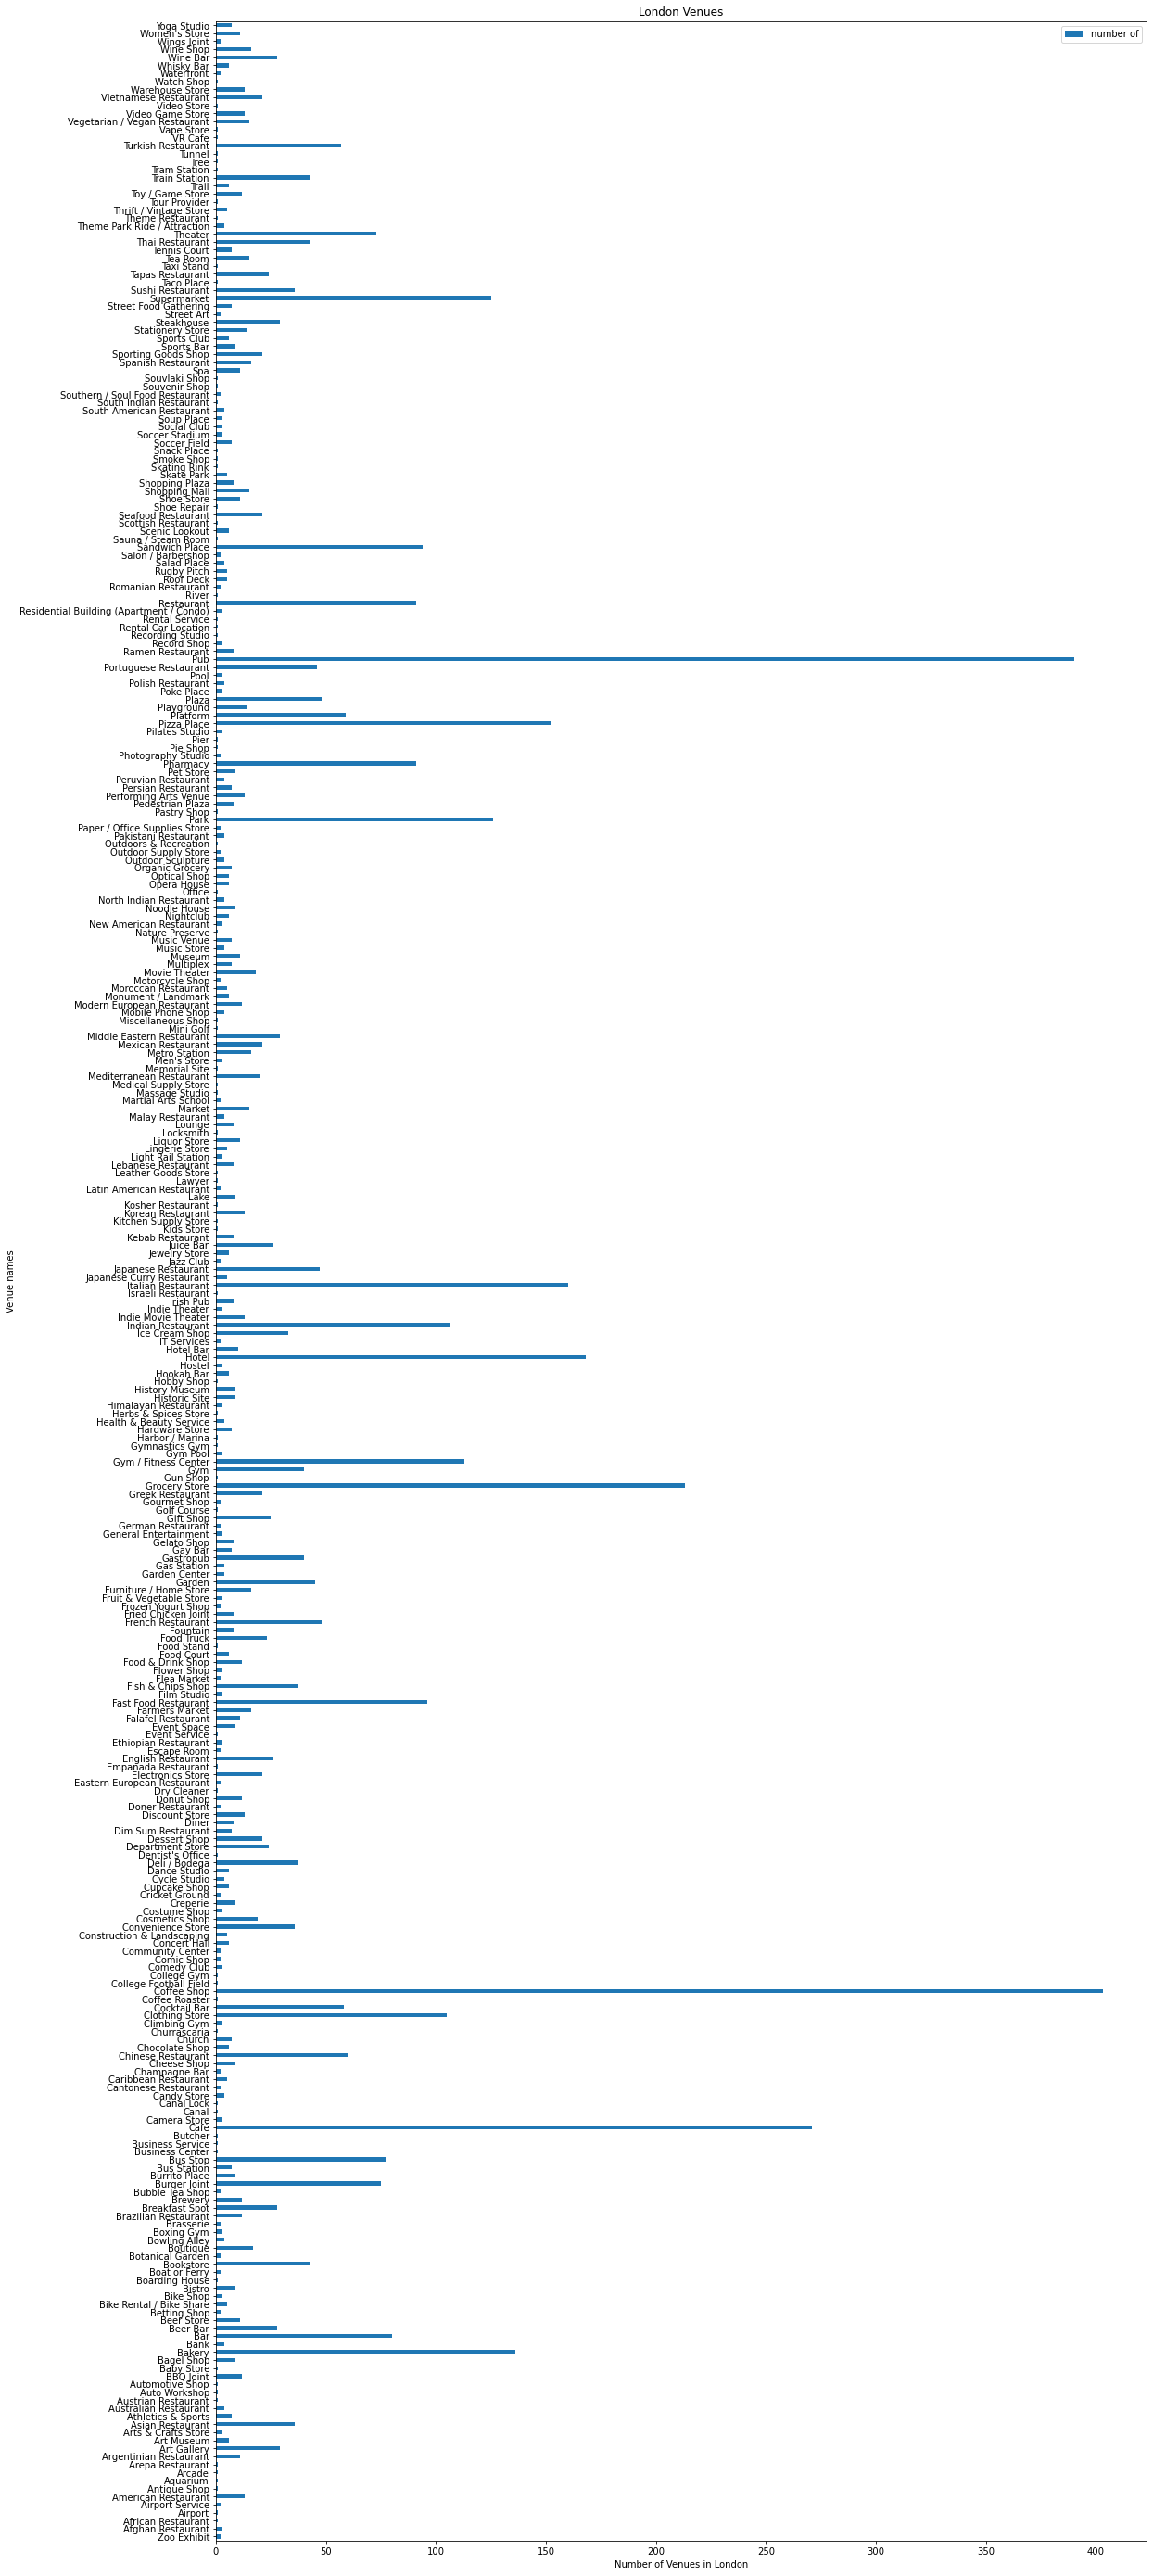

In [31]:
lon_q = pd.DataFrame({'name': col_lon , 'number of': row_lon})

lon_q.plot(kind='barh', figsize=(18,50), alpha=1)
plt.xlabel("Number of Venues in London")
plt.ylabel("Venue names")
plt.title("London Venues")

### B) New York City Data

In [32]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [33]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [34]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [35]:
nyc_data = newyork_data['features']

In [36]:
nyc_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [37]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 
nyc_neigh = pd.DataFrame(columns=column_names)
nyc_neigh

,Neighborhood,Latitude,Longitude


In [38]:
for data in nyc_data:
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neigh = nyc_neigh.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [39]:
nyc_neigh.head()

,Neighborhood,Latitude,Longitude
0,Wakefield,40.894705,-73.847201
1,Co-op City,40.874294,-73.829939
2,Eastchester,40.887556,-73.827806
3,Fieldston,40.895437,-73.905643
4,Riverdale,40.890834,-73.912585


##### Map of New York City

In [40]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10)

# add markers to map
for lat, lng,neighborhood in zip(nyc_neigh['Latitude'], nyc_neigh['Longitude'], nyc_neigh['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [41]:
url_nyc = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    NYC_latitude, 
    NYC_longitude, 
    500, 
    LIMIT)
url_nyc

'https://api.foursquare.com/v2/venues/explore?&client_id=ZYW1TZJNOTVH4KKWIFEVQRNYH3GVMHTGCRQ4AQ2LSNYXEXF1&client_secret=B5UOAYUGTJGSZ5XKTTGUS421D0TKNUAJNUBLLW5PHICQX5MJ&v=20180605&ll=40.7127281,-74.0060152&radius=500&limit=100'

In [42]:
results_nyc = requests.get(url_nyc).json()
results_nyc

{'meta': {'code': 200, 'requestId': '5ff9bcae14532e7aaf120de4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 108,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labe

In [43]:
# get_category_type defined above

nyc_venues = results_nyc['response']['groups'][0]['items']
    
nearby_nyc_venues = json_normalize(nyc_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_nyc_venues =nearby_nyc_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_nyc_venues['venue.categories'] = nearby_nyc_venues.apply(get_category_type, axis=1)

# clean columns
nearby_nyc_venues.columns = [col.split(".")[-1] for col in nearby_nyc_venues.columns]

nearby_nyc_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
2,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
3,City Hall Park,Park,40.711893,-74.007792
4,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661


In [44]:
# get_nearbyvenues defined above

nyc_venues = getNearbyVenues(names = nyc_neigh['Neighborhood'] , 
                                  latitudes = nyc_neigh['Latitude'],
                                  longitudes=nyc_neigh['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

##### Venues of Neighborhood of New York City

In [45]:
print(nyc_venues.shape)
nyc_venues.head()

(10037, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [46]:
nyc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,28,28,28,28,28,28
Annadale,12,12,12,12,12,12
Arden Heights,5,5,5,5,5,5
Arlington,5,5,5,5,5,5
Arrochar,20,20,20,20,20,20
...,...,...,...,...,...,...
Woodhaven,24,24,24,24,24,24
Woodlawn,28,28,28,28,28,28
Woodrow,19,19,19,19,19,19


##### OneHot Coding Feature

In [47]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']] , prefix="" , prefix_sep="")

nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood']

fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
nyc_neigh = nyc_onehot.groupby('Neighborhood').sum().reset_index()
nyc_neigh

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Allerton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Annadale,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arden Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arlington,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arrochar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Woodhaven,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,Woodrow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,Woodside,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
nyc_neigh.loc['Total'] = nyc_neigh.sum()
nyc_neigh.tail()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
298,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,Woodrow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,Woodside,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
301,Yorkville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,0
Total,AllertonAnnadaleArden HeightsArlingtonArrochar...,71,10,3,4,6,1,160,6,2,...,1,2,1,2,1,6,64,94,12,27


##### New York City Venues Count

In [50]:
nyc_f = nyc_neigh.iloc[[-1]] 
nyc_f.iloc[[0],[0]] = 'New York City'
nyc_f

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,...,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
Total,New York City,71,10,3,4,6,1,160,6,2,...,1,2,1,2,1,6,64,94,12,27


##### New York City Venues Bar Chat

In [52]:
col_nyc = list(nyc_f.columns.values)
col_nyc = col_nyc[1::]

nyc_f_ =nyc_f.drop(columns = ['Neighborhood'])
row_nyc = nyc_f_.iloc[0]

Text(0.5, 1.0, 'Venues in New York City')

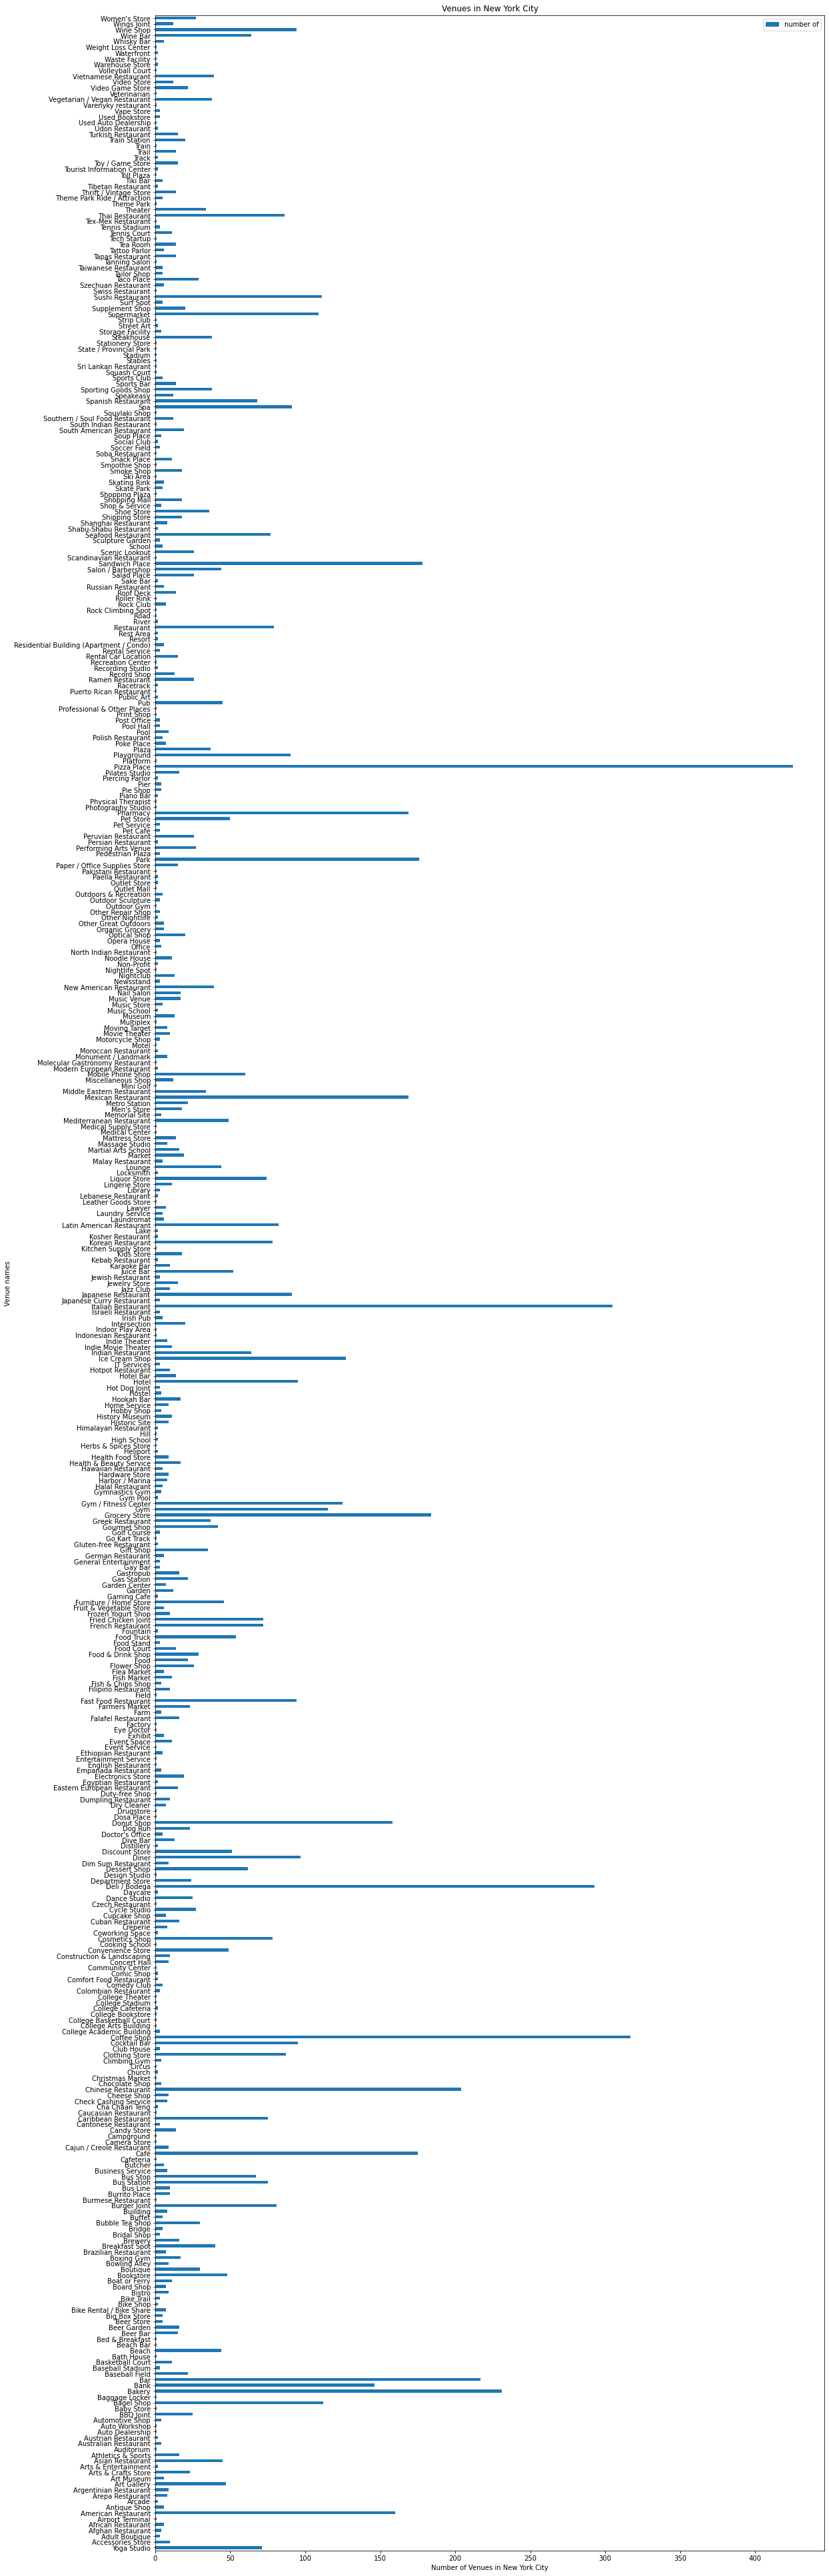

In [53]:
nyc_q = pd.DataFrame({'name': col_nyc , 'number of': row_nyc})

nyc_q.plot(kind='barh', figsize=(18,70), alpha=1)
plt.xlabel("Number of Venues in New York City")
plt.ylabel("Venue names")
plt.title("Venues in New York City")

### C) Toronto Data

In [54]:
Toronto_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [55]:
Toronto_table = Toronto_data[0]

In [56]:
Toronto_table.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [57]:
Toronto_table.drop(Toronto_table[Toronto_table['Neighbourhood'] == 'Not assigned'].index, inplace = True)
Toronto_table.reset_index(drop=True,inplace=True)
Toronto_table.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [58]:
To_coor = pd.read_csv('https://cocl.us/Geospatial_data')
To_coor.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [59]:
Toronto_tab = pd.merge(Toronto_table, To_coor, on='Postal Code')
Toronto_tab.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


##### Map of Toronto

In [60]:
# create map using latitude and longitude values
map_to = folium.Map(location=[To_latitude, To_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Toronto_tab['Latitude'], Toronto_tab['Longitude'], Toronto_tab['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

In [61]:
Toronto_venues = getNearbyVenues(names=Toronto_tab['Neighbourhood'] , latitudes=Toronto_tab['Latitude'], longitudes=Toronto_tab['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

##### Venues of Neighborhood of Toronto

In [62]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [63]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",21,21,21,21,21,21
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,4,4,4,4,4,4
Woodbine Heights,6,6,6,6,6,6


#### OneHot Coding Feature

In [64]:
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']] , prefix="" , prefix_sep="")

Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood']

fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
Toronto_neigh = Toronto_onehot.groupby('Neighborhood').sum().reset_index()
Toronto_neigh

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bedford Park, Lawrence Manor East",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Woburn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,Woodbine Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,York Mills West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Toronto_neigh.loc['Total'] = Toronto_neigh.sum()
Toronto_neigh

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bedford Park, Lawrence Manor East",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Woburn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,Woodbine Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,York Mills West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,"York Mills, Silver Hills",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
Toronto_f = Toronto_neigh.iloc[[-1]] 
Toronto_f

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
Total,"AgincourtAlderwood, Long BranchBathurst Manor,...",15,1,2,1,1,2,3,2,26,...,3,1,16,3,12,1,9,1,1,4


##### Toronoto Venues Count

In [68]:
Toronto_f.iloc[[0],[0]] = 'Toronto'
Toronto_f

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
Total,Toronto,15,1,2,1,1,2,3,2,26,...,3,1,16,3,12,1,9,1,1,4


In [69]:
col_To = list(Toronto_f.columns.values)
col_To = col_To[1::]

Toronto_f_ = Toronto_f.drop(columns = ['Neighborhood'])
row_To = Toronto_f_.iloc[0]

#### Toronto Venues Bar Chat

Text(0.5, 1.0, 'Toronto Venues')

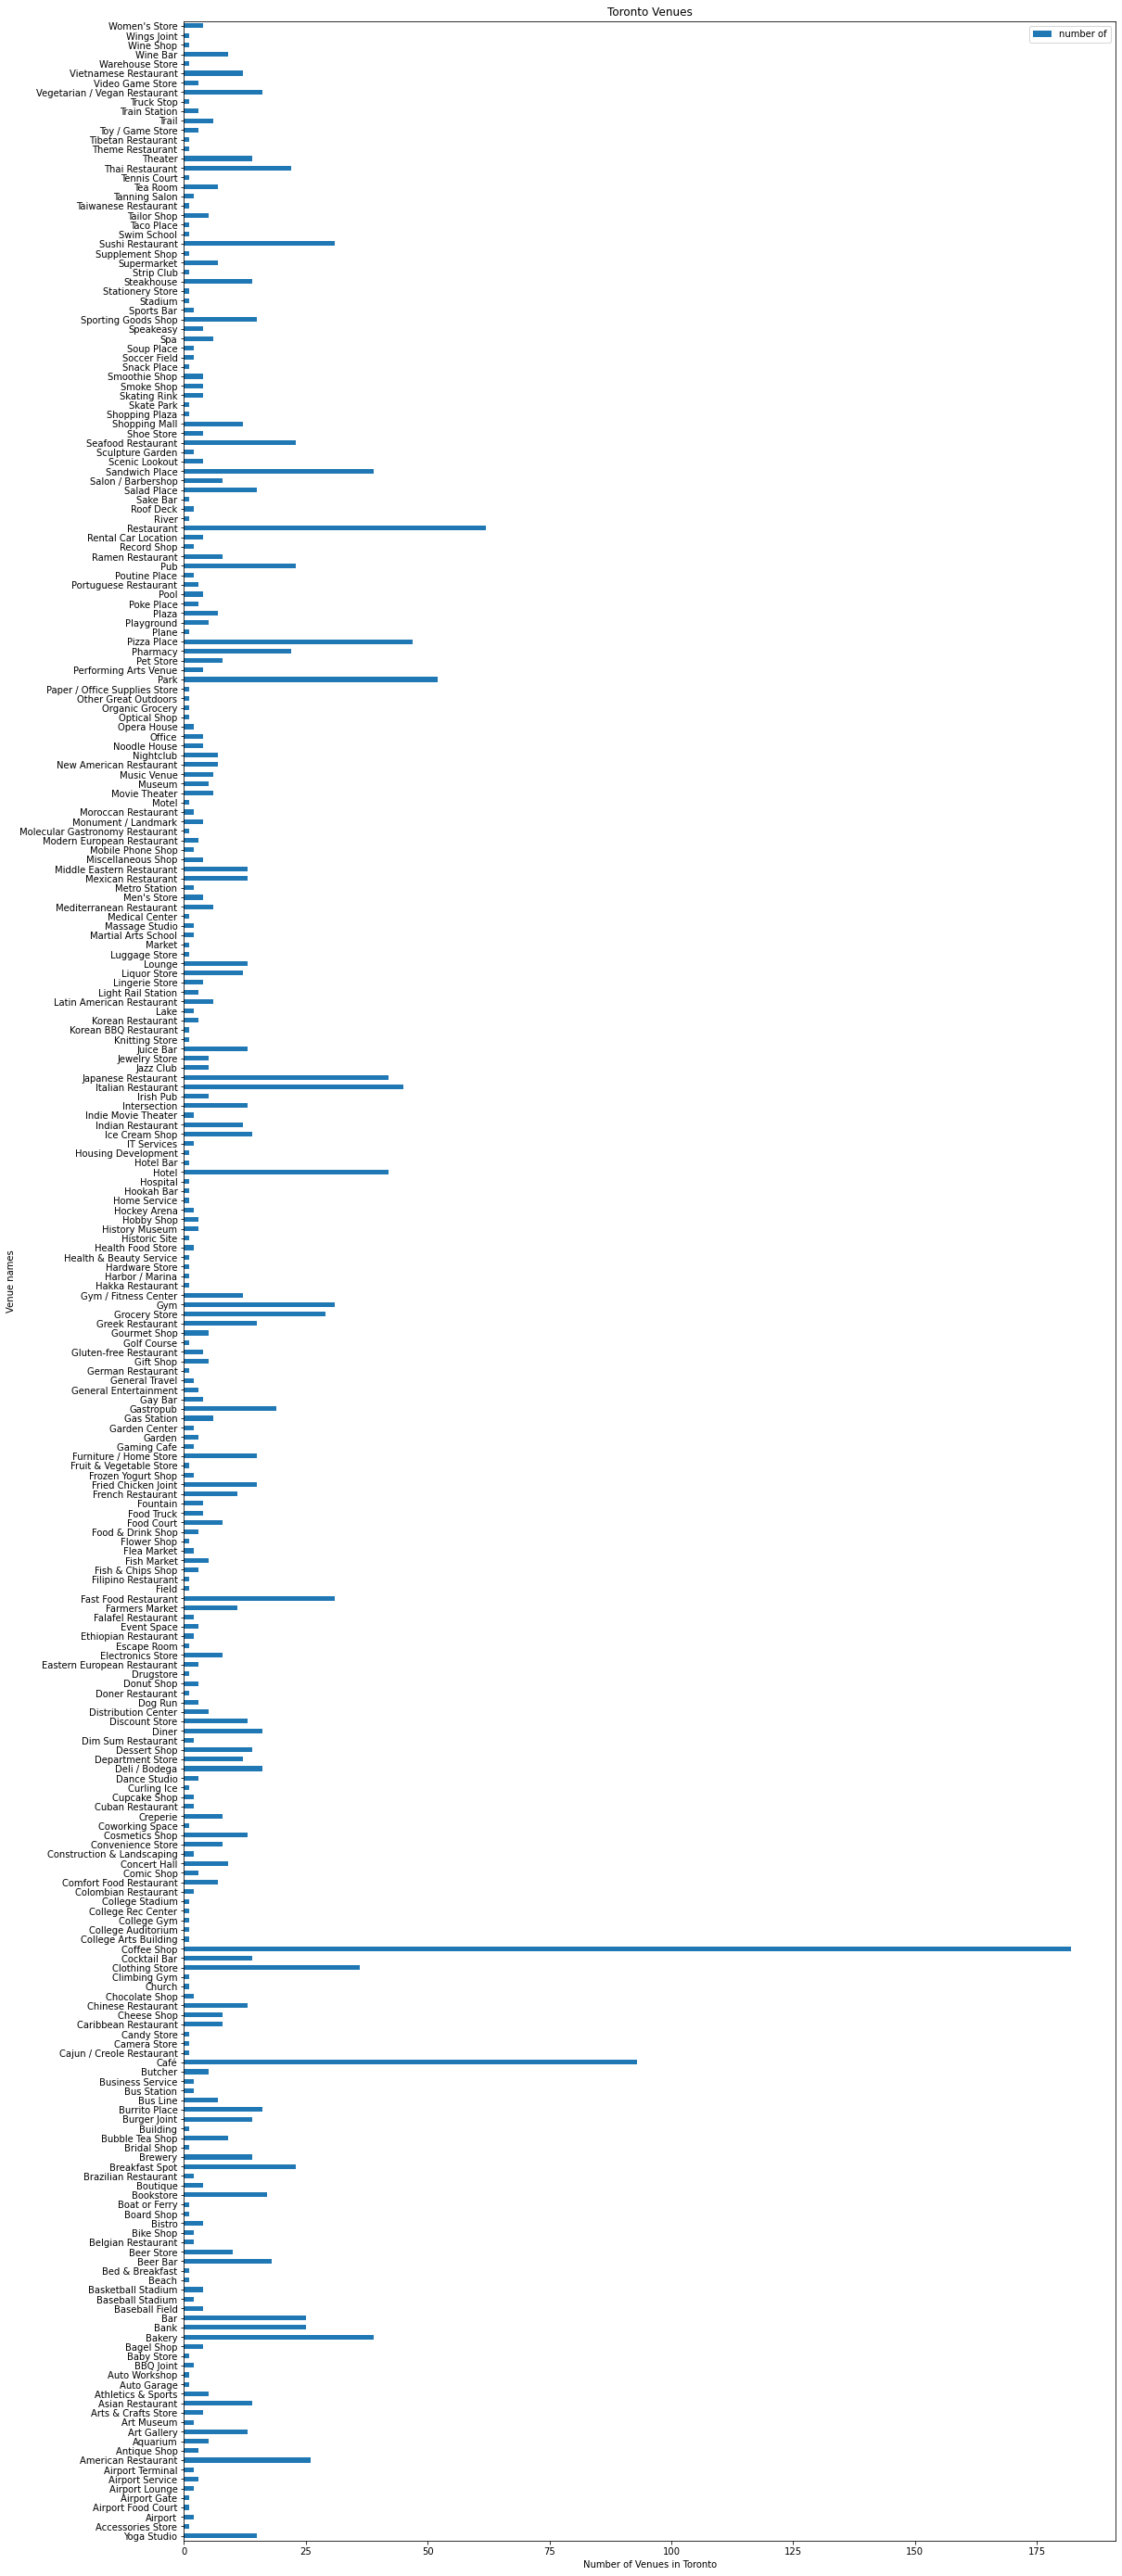

In [70]:
To_q = pd.DataFrame({'name': col_To , 'number of': row_To})

To_q.plot(kind='barh', figsize=(18,50), alpha=1)

plt.label = '{}'.format(row_To)
plt.xlabel("Number of Venues in Toronto")
plt.ylabel("Venue names")
plt.title("Toronto Venues")

### Similarity

In [71]:
df = pd.concat([lon_f , nyc_f , Toronto_f])

In [72]:
df = df.fillna(0)
df

,Neighborhood,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,...,Hockey Arena,Hospital,Housing Development,Knitting Store,Korean BBQ Restaurant,Luggage Store,Plane,Poutine Place,Swim School,Truck Stop
Total,London,2.0,3.0,1.0,1.0,2.0,13,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,New York City,0.0,4.0,6.0,0.0,0.0,160,6,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,Toronto,0.0,0.0,0.0,2.0,3.0,26,3,5.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [73]:
df = df.set_index('Neighborhood', drop = True)
df

,Zoo Exhibit,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Hockey Arena,Hospital,Housing Development,Knitting Store,Korean BBQ Restaurant,Luggage Store,Plane,Poutine Place,Swim School,Truck Stop
Neighborhood,,,,,,,,,,,,,,,,,,,,,
London,2.0,3.0,1.0,1.0,2.0,13,1,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New York City,0.0,4.0,6.0,0.0,0.0,160,6,0.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toronto,0.0,0.0,0.0,2.0,3.0,26,3,5.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0


In [74]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(df)
similarity_matrix

array([[1.        , 0.70286691, 0.82037766],
       [0.70286691, 1.        , 0.75601955],
       [0.82037766, 0.75601955, 1.        ]])

In [75]:
print("Cosine Similarity between London & New York City = {}".format(similarity_matrix[0][1]))

print("Cosine Similarity between Toronto & New York City = {}".format(similarity_matrix[1][2]))

print("Cosine Similarity between London & Toronto = {}".format(similarity_matrix[0][2]))

Cosine Similarity between London & New York City = 0.7028669094963663
Cosine Similarity between Toronto & New York City = 0.7560195483899007
Cosine Similarity between London & Toronto = 0.820377664109813


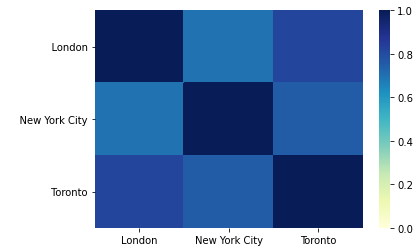

In [76]:
import seaborn as sns
ax = sns.heatmap(similarity_matrix , vmin=0, vmax=1 , cmap="YlGnBu" , xticklabels = ['London' , 'New York City' , 'Toronto'], yticklabels = ['    London' , '    New York City' , ' Toronto'])

## Hence we conclude that London and Toronto are more similar among London , New York City and Toronto

Conclusion: In this project, I separated each city into its neighborhood. For each neighborhood in city I calculated the number of different types of venues available with there respective lattitude and logitude from dataset. Using the charts above results presented by the similarity matrix using cosine similarity we conclused which two cities are most similar to each other.

#### Blog Plot Link : 

#### Email id : khandelwal.4@iitj.ac.in

### Thank You! Hope you liked my work